# Fandango Movie Ratings - investigation

[Fandango](https://www.fandango.com/) is an American online movie ratings aggregator that help viewers discover movies with trailers and movie clips and also sell tickets via telephone and Internet. Fandango has counted more than 36 millions visitors each month.

In October 2015, Walt Hickey - a data journalist - analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest: the actual rating was almost always **rounded up** to the nearest half-star (For example, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as we may expect...) 

The project is about to analyze more recent movie ratings data of Fandango to determine whether there has any change in their rating system after Hickey's analysis.

## Understanding the Data

One of the best ways to figure out there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics *previous* and *after* the analysis. Fortunately, we have ready-made data for both these periods of time on GitHub:
- Data previous to the analysis: [`fandango_score_comparison.csv`](https://github.com/fivethirtyeight/data/tree/master/fandango)
- Data after the analysis, containing the ratings for 2016 and 2017: [`movie_rating_16_17.csv`](https://github.com/mircealex/Movie_ratings_2016_17)

In [1]:
import pandas as pd
pd.options.display.max_columns = 100 # Avoid having displayed truncated output

# display the data previous to Hickey's analysis
before = pd.read_csv('fandango_score_comparison.csv')
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
# display the data after Hickey's analysis
after = pd.read_csv('movie_rating_16_17.csv')
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Below we read the 2 datasets and isolate only the columns that provide information about Fandango. We'll make copies to avoid any `SettingWithCopyWarning` later on.

In [3]:
fandango_before = before[
    ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
].copy()

fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_after = after[['movie', 'year', 'fandango']].copy()
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The **population of interest** refers to all movies ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at 2 different periods in time - before and after Hickey's analysis - so we can compare the 2 states.

We need to make sure that the samples we're picking are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

In the one hand, from Hickey's article and from the README.md of the repository [before analysis](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md), we can notice some following sampling criteria he used:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling is undoubtedly not random because not every movie had the same chance to be include in the sample: some movies had under 30 ratings, others having not tickets on sale in 2015...).  

In the other hand, from the article and the README.md of the repository [after analysis](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), the sampling conditions are that:
- The movie must have been released in 2016 or later.
- The movie must have had a "significant number of votes" (which is not detaile in the README.md and in the data).

There are the same sampling problems as the "before analysis" data.

We can conclude that the sampling processes were not random, and the resulting samples are very unlikely to be representative of the population we're intersted in describing.

## Changing the Goal of our Analysis

To make our sample as representative as possible of the population of interest, we can change slightly the current goal of our analysis:

**Determine whether there has been any change in Fandango's ratings for POPULAR MOVIES in 2015 and one for POPULAR MOVIES in 2016.**

This new goal should be a fairly good proxy for our initial goal.

## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

A movie is considered as "popular" if it has 30 fan ratings or more on Fandango's website.

The data set "after analysis" doesn't provide information about the number of fan ratings, and this raises representativity issues once again. We can do a quick check by picking randomly a sample of 10 movies and then check the number of fan ratings ourselves on Fandago's website. Ideally, if at least 8 out of 10 movies haves 30 fan ratings or more, the sample is representative enough. 

In [5]:
check = fandango_after.sample(10, random_state=1)
check

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of May 2019, these are the fan ratings we found:

|Movies                                 |Fan ratings                     |
|---------------------------------------|--------------------------------|
|Mechanic: Ressurection                 |2,252                           |
|Warcraft                               |7,284                           |
|Max Steel                              |495                             |
|Me Before You                          |5,274                           |
|Fantastic Beasts and Where to Find Them|13,506                          |
|Cell                                   |18                               |
|Genius                                 |127                             |
|Sully                                  |11,890                          |
|A Hologram for the King                |501                             |
|Captain American: Civil War            |31,186                          |
    
There are actually 9 out of 10 movies have more than 30 ratings. This is enough to move forward with a bit more confidence.

The next step is to isolate only sample points that belong to our populations of interest, that is movies released only in 2015 and 2016.

In [6]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [7]:
# Examine the frequency distribution for the Year column
fandango_before['Year'].value_counts(dropna=False)

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
# Isolate the movies released in 2015
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [9]:
fandango_after['year'].value_counts(dropna=False)

2016    191
2017     23
Name: year, dtype: int64

In [10]:
# Isolate the movies released in 2016
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. Let's start with a high-level comparison between the shapes of the distributions of movie ratings for both samples.

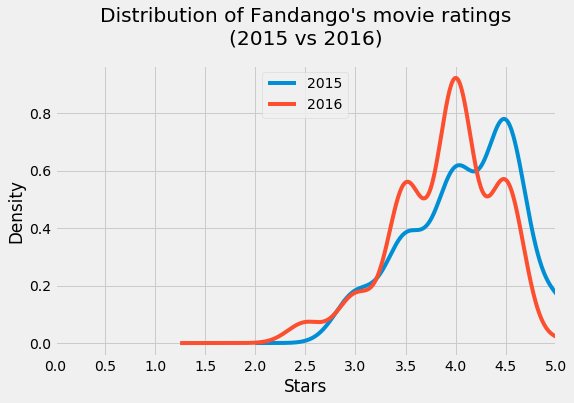

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label="2015", legend=True, figsize=(8,5))
fandango_2016['fandango'].plot.kde(label="2016", legend=True)

plt.title("Distribution of Fandango's movie ratings\n(2015 vs 2016)", y = 1.05)
plt.legend(loc="upper center")
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.5,.5))

plt.show()

According to the plot, we can notice:
- Both distributions in 2015 and 2016 are strongly left skewed.
- The 2016 distribution is slightly shifted to the left compared to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango also sells tickets, the high ratings are a bit dubious.

In comparison with 2015, the 2016 shape moved backward to the left, that suggest that there was a difference indeed between Fandango's movie ratings in popular movies in 2016 and one in 2015. In other words, movies in 2016 were rated lower than those in 2015.

## Comparing Relative Frequencies

In [12]:
print(fandango_2015.shape)
print(fandango_2016.shape)

(129, 6)
(191, 3)


Since the samples have different number of movies, it doesn't make sense to compare the two tables using absolute frequencies. We normalize the tables and show percentages instead.

In [13]:
print('Distribution stars 2015')
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

Distribution stars 2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
print('Distribution stars 2016')
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

Distribution stars 2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentages was up to 7%. Ratings of 4.5 in 2016 dropped as well relative to 2015 (24.6% vs 38%).

The 4-star ratings in 2016 were very popular, up to 40% of the movie on Fandango's website. Compared to 2015, it was only 29%. The same applies to 3.5 star ratings. It suggests that movies had a tendency to be rated "more modestly" in 2016.

The minimum rating was also lower in 2016 - 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between two frequency distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

## Determine the Direction of the Change

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its **mean, median and mode**, and then compare these statistics to determine what they tell about the direction of the change.

In [15]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


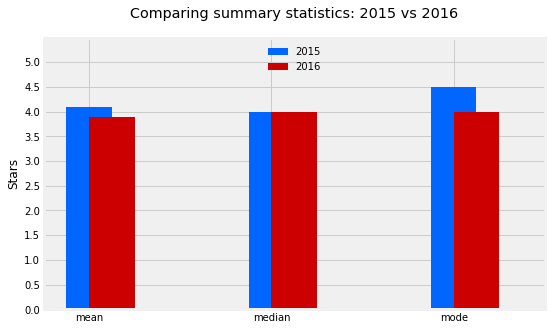

In [16]:
summary['2015'].plot.bar(label='2015', color='#0066FF', align='center', legend=True, width = .25, figsize=(8,5))
summary['2016'].plot.bar(label='2016', color='#CC0000', align ='edge', legend=True, width= .25)

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.05)
plt.xticks(rotation=0)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc="upper center", framealpha=0)

plt.show()


According to the summary table and the visualization, we can see that:
- The 2015 mean is slightly larger then the 2016 mean (4.08 vs 3.88).
- The 2015 median of 4 has no change compared to the 2016 median.
- The 2015 mode is larger than the 2016 mode (4.5 vs 4).

We confirm that: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movie released in 2016 were rated slightly lower than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very strong that because Fandango has been fixing the biased rating system after Hickey's analysis.